In [1]:
import numpy as np
import pandas as pd

In [2]:
# READ IN PDO INFO

In [3]:
pdo1_fn = '../data/yaspo_pdo1.csv'
pdo2_fn = '../data/yaspo_pdo2.csv'
pdx_fn = '../data/yaspo_pdx.csv'

In [4]:
df1 = pd.read_csv(pdo1_fn)
df1 = df1[['Patient ID', 'PDO', 'Drug', 'LOG10 IC50(µM)', 'Response category']]
df1 = df1.rename(columns={'Patient ID': 'patient_id', 'LOG10 IC50(µM)': 'log10_ic50_(uM)',
                         'Response category': 'pdo_response_category', 'PDO': 'pdo', 'Drug': 'drug'})
df1 = df1.drop_duplicates()
df1.head()

,patient_id,pdo,drug,log10_ic50_(uM),pdo_response_category
0,108_T,108_T_XEN_CELL,sorafenib,1.0642,Resistant
1,108_T,108_T_XEN_CELL,linifanib,1.0378,Resistant
2,108_T,108_T_XEN_CELL,regorafenib,0.9627,Resistant
3,108_T,108_T_XEN_CELL,sunitinib,0.9175,Resistant
4,108_T,108_T_XEN_CELL,5-FU,1.7782,Resistant


In [5]:
df2 = pd.read_csv(pdo2_fn)
df2 = df2[['Patient ID', 'PDO', 'Drug', 'LOG IC50 (µM)', 'Response category']]
df2 = df2.rename(columns={'Patient ID': 'patient_id', 'LOG IC50 (µM)': 'log10_ic50_(uM)',
                         'Response category': 'pdo_response_category', 'PDO': 'pdo', 'Drug': 'drug'})
df2 = df2.drop_duplicates()
df2.head()

,patient_id,pdo,drug,log10_ic50_(uM),pdo_response_category
0,151_METa,151_MET_CELL1,Cetuximab (IMC-C225),-1.482804,Resistant
1,155_T,155_T_XEN_CELL,Cetuximab (IMC-C225),-1.482804,Resistant
2,161_T,161_T_XEN_CELL,Cetuximab (IMC-C225),-1.482804,Resistant
3,162_T,162_T_CELL,Cetuximab (IMC-C225),-4.349265,Moderate response
4,190_T,190_T_CELL,Cetuximab (IMC-C225),-1.482804,Resistant


In [6]:
pdo_df = pd.concat([df1, df2], ignore_index=True).drop_duplicates()
assert len(pdo_df) == len(df1) + len(df2)
pdo_df.head()

,patient_id,pdo,drug,log10_ic50_(uM),pdo_response_category
0,108_T,108_T_XEN_CELL,sorafenib,1.0642,Resistant
1,108_T,108_T_XEN_CELL,linifanib,1.0378,Resistant
2,108_T,108_T_XEN_CELL,regorafenib,0.9627,Resistant
3,108_T,108_T_XEN_CELL,sunitinib,0.9175,Resistant
4,108_T,108_T_XEN_CELL,5-FU,1.7782,Resistant


In [7]:
# READ IN PDX INFO

In [8]:
xf = pd.read_csv(pdx_fn)
xf.head()

,PDX,cetuximab,AZD8931,selumetinib,afatinib,Avastin,regorafenib,nintedanib,BI 860585,oxaliplatin,irinotecan,5-FU,Unnamed: 12
0,273_T_XEN,1.0,39,36,20.0,33.0,58,45,36,46.0,10.0,40.0,NaN
1,259_T_XEN,1.0,26,58,20.0,49.0,35,50,33,68.0,10.0,34.0,NaN
2,139_MET_XEN,2.0,4,33,25.0,51.0,15,14,11,60.0,6.0,28.0,NaN
3,191_T_XEN,2.0,35,60,35.0,28.0,39,39,40,76.0,2.0,26.0,NaN
4,116_T_XEN,4.0,22,39,10.0,17.0,36,31,38,43.0,6.0,53.0,NaN


In [9]:
drugs = ['cetuximab', 'AZD8931', 'selumetinib', 'afatinib', 'Avastin',
       'regorafenib', 'nintedanib', 'BI 860585', 'oxaliplatin', 'irinotecan',
       '5-FU']
xf = xf[['PDX'] + drugs]
print(len(xf))
xf = xf.dropna()
print(len(xf))

n_pdx = xf.PDX.nunique()
assert len(xf) == n_pdx
n_drugs = len(drugs)

xf_list = []
for drug in drugs:
    drug_data = {'PDX': xf['PDX'], 'Drug': drug, 'T_C': xf[drug]}
    xf_list.append(pd.DataFrame(drug_data))
pdx_df = pd.concat(xf_list)
assert len(pdx_df) == len(drugs) * n_pdx
pdx_df = pdx_df.rename(columns={'PDX': 'pdx', 'Drug': 'drug'})
pdx_df.head()

59
57


,pdx,drug,T_C
0,273_T_XEN,cetuximab,1.0
1,259_T_XEN,cetuximab,1.0
2,139_MET_XEN,cetuximab,2.0
3,191_T_XEN,cetuximab,2.0
4,116_T_XEN,cetuximab,4.0


In [10]:
# assigning responses based on info from excel sheet
pdx_df.loc[(pdx_df['T_C'] >= 0) & (pdx_df['T_C'] <= 10), 'pdx_response_category'] = 'Strong response'
pdx_df.loc[(pdx_df['T_C'] >= 11) & (pdx_df['T_C'] <= 25), 'pdx_response_category'] = 'Moderate response'
pdx_df.loc[(pdx_df['T_C'] >= 26) & (pdx_df['T_C'] <= 50), 'pdx_response_category'] = 'Minor response'
pdx_df.loc[(pdx_df['T_C'] > 50), 'pdx_response_category'] = 'Resistant'
pdx_df.head()

,pdx,drug,T_C,pdx_response_category
0,273_T_XEN,cetuximab,1.0,Strong response
1,259_T_XEN,cetuximab,1.0,Strong response
2,139_MET_XEN,cetuximab,2.0,Strong response
3,191_T_XEN,cetuximab,2.0,Strong response
4,116_T_XEN,cetuximab,4.0,Strong response


In [11]:
# map pdx to patient id
pdx_to_id = {}
for pdx in list(pdx_df.pdx.unique()):
    if pdx.endswith('_XEN'):
        patient_id = pdx[:-4]
        pdx_to_id[pdx] = patient_id
    else:
        print(pdx)

150_MET1_XEN1
150_MET1_XEN5
150_MET1_XEN4
150_MET1_XEN3
150_MET1_XEN2


In [12]:
pdx_df['patient_id'] = pdx_df['pdx'].map(pdx_to_id)
pdx_df.head()

,pdx,drug,T_C,pdx_response_category,patient_id
0,273_T_XEN,cetuximab,1.0,Strong response,273_T
1,259_T_XEN,cetuximab,1.0,Strong response,259_T
2,139_MET_XEN,cetuximab,2.0,Strong response,139_MET
3,191_T_XEN,cetuximab,2.0,Strong response,191_T
4,116_T_XEN,cetuximab,4.0,Strong response,116_T


In [13]:
pdx_df.patient_id.unique()

array(['273_T', '259_T', '139_MET', '191_T', '116_T', '208_MET2',
       '208_MET1', '161_T', '209_T2', '234_T', '216_T', '109_T',
       '154_MET', '230_T', '159_T', '277_MET', '327_T', '227_T',
       '100_MET', '118_T1', '323_T', '135_T', '171_MET2', '299_T1',
       '278_T', nan, '171_MET1', '209_MET2', '372_T1', '352_MET', '155_T',
       '151_MET', '108_T', '280_T', '114_T', '181_T', '111_T', '212_T',
       '102_MET', '157_T', '128_T', '289_T', '106_T', '190_T', '183_T',
       '320_T', '283_T', '302_MET', '150_MET2', '184_T', '353_T', '238_T',
       '261_T'], dtype=object)

In [14]:
pdo_df.patient_id.unique()

array(['108_T', '114_T', '116_T', '151_METa', '152_T', '155_T', '159_T',
       '161_T', '162_T', '163_T', '170_T', '190_T', '195_T', '209_MET2',
       '216_T', '227_T', '234_T', '238_T', '239_T', '250_T', '261_T',
       '276_T', '278_T', '281_T', '288_MET', '292_MET', '299_T1', '300_T',
       '302_MET', '315_MET', '326_T', '327_T', '330_T', '352_MET',
       '364_MET'], dtype=object)

In [15]:
# get patient intersection
pdo_patients = set(pdo_df.patient_id.unique())
pdx_patients = set(pdx_df.patient_id.unique())
intersect_patients = pdo_patients.intersection(pdx_patients)
# get drug intersection
pdo_drugs = set(pdo_df.drug.unique())
pdx_drugs = set(pdx_df.drug.unique())
intersect_drugs = pdo_drugs.intersection(pdx_drugs)
print('intersect_patients')
print(list(intersect_patients))
print('intersect_drugs')
print(list(intersect_drugs))

intersect_patients
['234_T', '278_T', '261_T', '227_T', '327_T', '155_T', '352_MET', '114_T', '238_T', '216_T', '116_T', '302_MET', '159_T', '161_T', '209_MET2', '190_T', '299_T1', '108_T']
intersect_drugs
['selumetinib', 'AZD8931', 'nintedanib', 'irinotecan', 'regorafenib', 'afatinib', '5-FU', 'BI 860585', 'oxaliplatin']


In [16]:
df = pdo_df.merge(pdx_df, on=['patient_id', 'drug'])
df.head()

,patient_id,pdo,drug,log10_ic50_(uM),pdo_response_category,pdx,T_C,pdx_response_category
0,108_T,108_T_XEN_CELL,regorafenib,0.9627,Resistant,108_T_XEN,37.0,Minor response
1,108_T,108_T_XEN_CELL,5-FU,1.7782,Resistant,108_T_XEN,77.0,Resistant
2,108_T,108_T_XEN_CELL,oxaliplatin,0.5855,Minor response,108_T_XEN,14.0,Moderate response
3,108_T,108_T_XEN_CELL,nintedanib,0.4852,Minor response,108_T_XEN,49.0,Minor response
4,108_T,108_T_XEN_CELL,BI 860585,-0.0771,Minor response,108_T_XEN,40.0,Minor response


In [17]:
print(df.patient_id.unique())

['108_T' '114_T' '116_T' '155_T' '159_T' '161_T' '190_T' '209_MET2'
 '216_T' '227_T' '234_T' '238_T' '261_T' '278_T' '299_T1' '302_MET'
 '327_T' '352_MET']


In [18]:
print(df.drug.unique())

['regorafenib' '5-FU' 'oxaliplatin' 'nintedanib' 'BI 860585' 'selumetinib'
 'AZD8931' 'afatinib' 'irinotecan']


In [19]:
drug_set = set(['regorafenib', '5-FU', 'oxaliplatin', 'nintedanib', 'BI 860585', 'selumetinib',
 'AZD8931', 'afatinib', 'irinotecan'])
set(df.loc[df.patient_id == '108_T'].drug.unique()) == drug_set

False

In [20]:
patient_list = []
for patient_id in list(df.patient_id.unique()):
    if set(df.loc[df.patient_id == patient_id].drug.unique()) == drug_set:
        patient_list.append(patient_id)

In [21]:
patient_list

['155_T',
 '159_T',
 '161_T',
 '190_T',
 '209_MET2',
 '227_T',
 '234_T',
 '261_T',
 '299_T1',
 '302_MET',
 '327_T',
 '352_MET']

In [22]:
df = df.loc[df.patient_id.isin(patient_list)]
df = df.loc[df.drug.isin(drug_set)]

In [23]:
len(df)

108

In [24]:
df.patient_id.nunique()

12

In [25]:
df.drug.nunique()

9

In [26]:
df = df.dropna()
len(df)

108

In [27]:
df.head(25)

,patient_id,pdo,drug,log10_ic50_(uM),pdo_response_category,pdx,T_C,pdx_response_category
24,155_T,155_T_XEN_CELL,AZD8931,0.7519,Resistant,155_T_XEN,53.0,Resistant
25,155_T,155_T_XEN_CELL,5-FU,1.7782,Resistant,155_T_XEN,47.0,Minor response
26,155_T,155_T_XEN_CELL,oxaliplatin,1.7782,Resistant,155_T_XEN,53.0,Resistant
27,155_T,155_T_XEN_CELL,regorafenib,0.6381,Minor response,155_T_XEN,44.0,Minor response
28,155_T,155_T_XEN_CELL,afatinib,0.2441,Minor response,155_T_XEN,79.0,Resistant
29,155_T,155_T_XEN_CELL,nintedanib,0.1824,Minor response,155_T_XEN,50.0,Minor response
30,155_T,155_T_XEN_CELL,BI 860585,0.0048,Minor response,155_T_XEN,80.0,Resistant
31,155_T,155_T_XEN_CELL,selumetinib,-0.4503,Moderate response,155_T_XEN,25.0,Moderate response
32,155_T,155_T_XEN_CELL,irinotecan,1.1525,Resistant,155_T_XEN,21.0,Moderate response
33,159_T,159_T_CELL,regorafenib,0.8496,Resistant,159_T_XEN,30.0,Minor response


In [28]:
def list_to_indices(keys):
    n_keys = len(keys)
    values = range(n_keys)
    return dict(zip(keys, values))

drugs = list(df.drug.unique())
samples = list(df.patient_id.unique())
drug_indices = list_to_indices(drugs)
sample_indices = list_to_indices(samples)
df['drug_id'] = df['drug'].map(drug_indices)
df['sample_id'] = df['patient_id'].map(sample_indices)

In [29]:
df.head()

,patient_id,pdo,drug,log10_ic50_(uM),pdo_response_category,pdx,T_C,pdx_response_category,drug_id,sample_id
24,155_T,155_T_XEN_CELL,AZD8931,0.7519,Resistant,155_T_XEN,53.0,Resistant,0,0
25,155_T,155_T_XEN_CELL,5-FU,1.7782,Resistant,155_T_XEN,47.0,Minor response,1,0
26,155_T,155_T_XEN_CELL,oxaliplatin,1.7782,Resistant,155_T_XEN,53.0,Resistant,2,0
27,155_T,155_T_XEN_CELL,regorafenib,0.6381,Minor response,155_T_XEN,44.0,Minor response,3,0
28,155_T,155_T_XEN_CELL,afatinib,0.2441,Minor response,155_T_XEN,79.0,Resistant,4,0


In [30]:
df.to_csv('../data/yaspo_combined.csv', index=False)

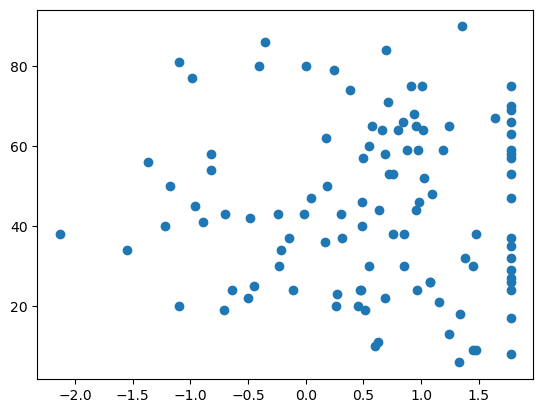

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df['log10_ic50_(uM)'], df['T_C'])

In [32]:
df.drug_id.nunique()

9

In [33]:
df.sample_id.nunique()

12